# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-концентрации-металлов-на-различных-стадиях-очистки" data-toc-modified-id="Исследование-концентрации-металлов-на-различных-стадиях-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование концентрации металлов на различных стадиях очистки</a></span></li><li><span><a href="#Исследование-распределения-размеров-гранул-сырья-на-обучающих-и-тестовых-данных" data-toc-modified-id="Исследование-распределения-размеров-гранул-сырья-на-обучающих-и-тестовых-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование распределения размеров гранул сырья на обучающих и тестовых данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Анализ-на-тренировочных-данных" data-toc-modified-id="Анализ-на-тренировочных-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ на тренировочных данных</a></span></li><li><span><a href="#Анализ-на-тестовых-данных" data-toc-modified-id="Анализ-на-тестовых-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ на тестовых данных</a></span></li><li><span><a href="#Анализ-константной-модели" data-toc-modified-id="Анализ-константной-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ константной модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
RS = 12345

warnings.filterwarnings('ignore')
sns.set_style()
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = 10.0, 6.0

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
train.name = 'train'
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
test.name='test'
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
full.name = 'full'

Для удобства в дальнейшей работе создадим список, включающий в себя исходные данные:

In [3]:
dfs = [train, test, full]

Создадим функцию `data_info`, выводящую на экран информацию о таблице:

In [4]:
def data_info(data):
    print(f'Выведем первые 5 строк таблицы:')
    display(data.head())
    print(f'Выведем последние 5 строк таблицы:')
    display(data.tail())
    print(f'Выведем случайные 5 строк таблицы:')
    display(data.sample(5, random_state=RS))
    print(f'Выведем основную информацию о таблице:')
    data.info()
    print()
    print(f'Выведем описательные статистики таблицы:')
    display(data.describe().T)
    print(f'Проверим таблицу на пропуски: ')
    display(data.isna().sum())
    print(f'Проверим таблицу на дубликаты: ')
    display(data.duplicated().sum())

Рассмотрим основную информацию о таблицах:

In [5]:
for df in dfs:
    print(f'Информация о таблице {df.name}:')
    data_info(df)

Информация о таблице train:
Выведем первые 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Выведем последние 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
14148,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


Выведем случайные 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4899,2017-01-10 03:59:59,3.712425,8.033828,13.631412,48.473231,70.709139,8.845224,2.632767,10.380058,2.675636,...,13.991523,-500.874847,12.074159,-500.703556,14.187136,-500.286314,8.032679,-500.363601,20.024847,-601.179514
4590,2016-08-27 22:59:59,5.978141,9.574893,8.422982,44.573758,68.039692,8.567373,3.003479,7.918957,3.592308,...,16.072388,-499.387917,9.907356,-499.958368,9.944949,-498.581784,5.023244,-500.009504,24.990671,-499.649837
4350,2016-08-17 11:59:59,6.090347,9.649611,10.872579,43.291846,77.926649,10.425093,2.459391,9.453206,2.693327,...,18.014157,-401.020413,9.951050,-400.346093,15.062787,-401.550850,5.040687,-400.621257,20.984830,-500.428460
2390,2016-05-17 13:59:59,4.107255,9.388371,10.151618,46.735425,59.416695,10.049323,2.002330,11.214887,3.901251,...,9.935985,-500.429014,8.023361,-500.645150,8.991750,-502.006649,6.059779,-500.207392,20.007208,-500.643078
8804,2017-07-20 06:59:59,3.700473,11.842490,7.167722,45.703119,61.289448,8.039743,3.218959,11.261780,2.938968,...,21.990983,-500.127872,15.065825,-379.011281,18.033518,-500.147671,12.989467,-499.970974,15.004780,-500.176501


Выведем основную информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primar

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906


Проверим таблицу на пропуски: 


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Проверим таблицу на дубликаты: 


0

Информация о таблице test:
Выведем первые 5 строк таблицы:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Выведем последние 5 строк таблицы:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5285,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5289,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937


Выведем случайные 5 строк таблицы:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3059,2017-09-23 13:59:59,191.516501,8.512363,7.055,1.363213,1.450592e+03,-497.408756,1.449222e+03,-503.851176,1.446431e+03,...,12.040520,-499.248216,8.992746,-397.450195,9.120252,-499.374966,7.050235,-497.296824,9.992202,-499.768321
967,2016-10-21 09:59:59,132.578251,7.463113,7.130,1.285660,1.580076e+03,-499.572139,1.696802e+03,-500.323478,1.698635e+03,...,20.023207,-498.618363,17.016355,-500.640003,17.092744,-499.159348,14.015016,-487.092680,21.565209,-658.690743
5040,2017-12-20 05:59:59,243.104320,14.012229,8.510,1.542704,1.553023e+03,-500.509477,1.550945e+03,-535.592945,1.428885e+03,...,19.988108,-497.249334,15.136500,-498.593533,10.999085,-498.299175,8.961507,-499.975964,11.978406,-499.142050
5185,2017-12-27 11:59:59,7.469704,NaN,7.200,0.004984,5.445860e-32,-782.195107,6.647490e-32,-496.247779,4.033736e-32,...,3.265143,-799.427634,1.080343,-799.879409,0.200600,-797.323986,1.420606,-800.118587,0.016815,-789.840007
2990,2017-09-20 10:59:59,128.263148,8.513709,6.990,1.207682,1.399279e+03,-499.289866,1.400379e+03,-497.576573,1.399628e+03,...,11.953345,-499.742553,9.057378,-398.173553,8.937434,-500.346310,6.990392,-500.476996,10.008981,-499.854333


Выведем основную информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_leve

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035


Проверим таблицу на пропуски: 


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Проверим таблицу на дубликаты: 


0

Информация о таблице full:
Выведем первые 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Выведем последние 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
19438,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


Выведем случайные 5 строк таблицы:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5264,2016-10-04 14:59:59,6.794600,9.054957,16.004123,43.648261,69.972633,11.069316,3.055067,9.719336,3.595190,...,14.028001,-498.910216,13.032441,-500.358286,10.143363,-499.314485,8.147565,-499.650507,22.997377,-499.900959
12699,2017-09-17 21:59:59,5.110333,11.114576,7.572588,44.725173,69.415110,7.484338,2.814891,12.347273,2.740724,...,12.005280,-502.249154,8.916441,-401.636419,9.017671,-501.322562,7.018271,-500.837070,10.039155,-503.676153
4329,2016-08-16 14:59:59,6.441173,9.064088,11.273021,43.482633,74.092709,9.838359,2.748540,9.996859,3.466387,...,17.880962,-399.457823,10.029009,-400.402439,14.936650,-395.346330,4.959238,-400.204035,22.990928,-496.222805
558,2016-02-09 18:00:00,4.993571,11.321386,5.691245,43.493480,63.580614,10.676063,1.487393,18.834149,2.309034,...,20.016661,-496.383512,15.964599,-498.280089,18.051289,-500.899548,15.992132,-500.148410,24.973915,-499.066802
3300,2016-06-27 02:59:59,5.355851,7.035347,8.940517,47.588582,63.054522,9.120233,1.494015,13.932352,3.027215,...,17.025755,-499.709920,8.866634,-500.210883,16.966829,-499.891129,7.921560,-500.585852,24.985645,-501.155498


Выведем основную информацию о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primar

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


Проверим таблицу на пропуски: 


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Проверим таблицу на дубликаты: 


0

**Описание этапов**:

*Технологический процесс*:

* **Rougher feed** — исходное сырье
* **Rougher additions (или reagent additions)** — флотационные реагенты: Xanthate, Sulphate, Depressant
* **Xanthate** — ксантогенат (промотер, или активатор флотации);
* **Sulphate** — сульфат (на данном производстве сульфид натрия);
* **Depressant** — депрессант (силикат натрия).
* **Rougher process** (англ. «грубый процесс») — флотация
* **Rougher tails** — отвальные хвосты
* **Float banks** — флотационная установка
* **Cleaner process** — очистка
* **Rougher Au** — черновой концентрат золота
* **Final Au** — финальный концентрат золота

*Параметры этапов*:

* **air amount** — объём воздуха
* **fluid levels** — уровень жидкости
* **feed size** — размер гранул сырья
* **feed rate** — скорость подачи

*Наименование признаков*:

Наименование признаков формируется следующим образом:

[**этап**].[**тип_параметра**].[**название_параметра**]

Проверим, что эффективность обогащения рассчитана правильно.
Рассчитаем эффективность по следующей формуле:

$$Recovery = \frac{C \times (F - T)} {F \times (C - T)} \times 100\%$$

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Функция `check_rougher_recovery` рассчитывает **MAE** между исходными данными и расчётами:

In [6]:
def check_rougher_recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    
    recovery_calculated = (C * (F - T)) * 100/(F * (C - T))
    recovery_given = data['rougher.output.recovery']
    
    mae = mean_absolute_error(recovery_given, recovery_calculated)
    
    print(f'МАЕ между расчетами и значениями признака: {mae}')

In [7]:
check_rougher_recovery(train.
                       dropna(subset=['rougher.output.concentrate_au',
                                      'rougher.input.feed_au',
                                      'rougher.output.tail_au',
                                      'rougher.output.recovery'
                                     ]))

МАЕ между расчетами и значениями признака: 1.1100347049376097e-14


Значение метрики **MAE** близко к нулю - эффективность обогащения рассчитана **правильно**.

Приведем столбец с датами к формату `datetime` и заполним пропуски ближайшими соседями, так как соседние по времени параметры схожи:

In [8]:
#for df in dfs:
#    df.date = pd.to_datetime(df.date, format='%Y-%m-%dT%H:%M:%S')
#    df.fillna(method='ffill', inplace=True)
#    df.drop_duplicates(inplace=True)

In [9]:
#test.date = pd.to_datetime(test.date, format='%Y-%m-%dT%H:%M:%S')
#train.date = pd.to_datetime(test.date, format='%Y-%m-%dT%H:%M:%S')
#full.date = pd.to_datetime(test.date, format='%Y-%m-%dT%H:%M:%S')

In [10]:
test.fillna(method='ffill', inplace=True)
train.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)

Проанализируем признаки, недоступные в тестовых данных:

In [11]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовых данных отсуствуют столбцы этапов, характеризующие результат технологического процесса.(То, что получаем на выходе процесса). Остальные же столбцы исторически известны.

### Вывод

Предварительно можно утверждать, что имеющихся данных **достаточно** для построения модели машинного обучения и дальнейшего исследования.

В данных имелось некоторое количество пропусков, которые были заполнены ближайшими по дате **соседними значениями** в столбце.

Также была рассчитана метрика **MAE** между рассчитаным *recovery* и тем, что уже есть в таблице. Анализируя полученный результат, можно сделать вывод о соответствии между исходными данными и расчетами, так как метрика стремится к нулю.

Анализ столбцов, **отсутствующих** в тестовых данных, показал, что отсутствуют те признаки, которые образуются **на выходе** процесса, что в целом логично.

## Анализ данных

### Исследование концентрации металлов на различных стадиях очистки

Функция `concentrate_distr` по имеющимся данным строит график распределения концентрации на различных стадиях очистки:

In [12]:
def concentrate_distr(metal, data):
    cols = [f'rougher.input.feed_{metal}',
            f'rougher.output.concentrate_{metal}', 
            f'primary_cleaner.output.concentrate_{metal}',
            f'final.output.concentrate_{metal}'
           ]
    
    for col in cols:
        data[col].hist(bins=60, alpha=.5)
        
    metal = metal.capitalize()
    
    plt.title(f'Distribution of {metal} concentration after different purification stages')
    plt.xlabel(f'{metal} concentration, %')
    plt.ylabel('Count')
    plt.legend([f'{metal} concentration before flotation',
                f'{metal} concentraion after flotation',
                f'{metal} concentraion after primary clean',
                f'Final {metal} concentraion, %'
               ])
    plt.show()

Построим распределение для золота, серебра и свинца:

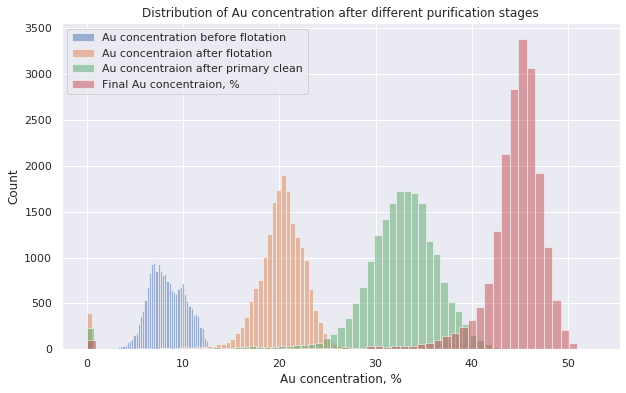

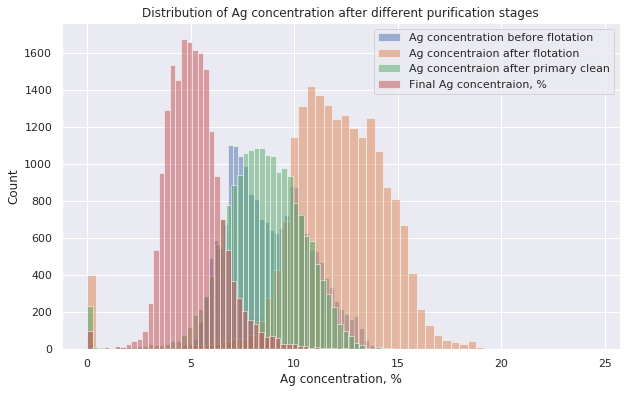

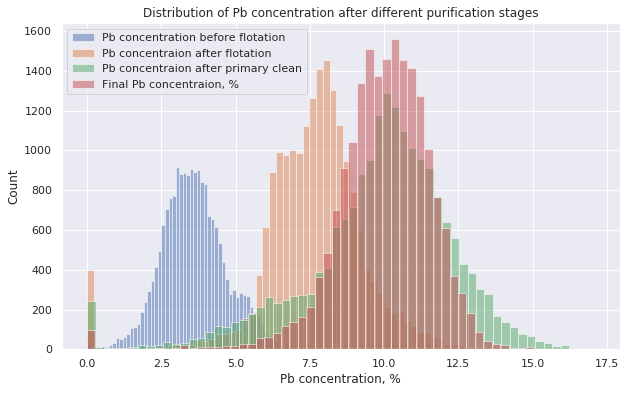

In [13]:
for m in ['au', 'ag', 'pb']:
    concentrate_distr(m, full)

Графики показывают, что концентрация в зависимости от металла меняется по разному.

Концентрация **золота** после каждого этапа очистки увеличивается. Концентрация **серебра** наоборот уменьшается.

Интересным образом показывает себя **свинец**: его концентрация увеличивает, а затем как бы усредняется. Это может быть связано с определенными химическими свойствами при процессе очистки.

Также заметим **выбросы** на нуле у каждого графика.

### Исследование распределения размеров гранул сырья на обучающих и тестовых данных

Построим график распределения размеров гранул сырья перед процессами флотации и первичной очистки:

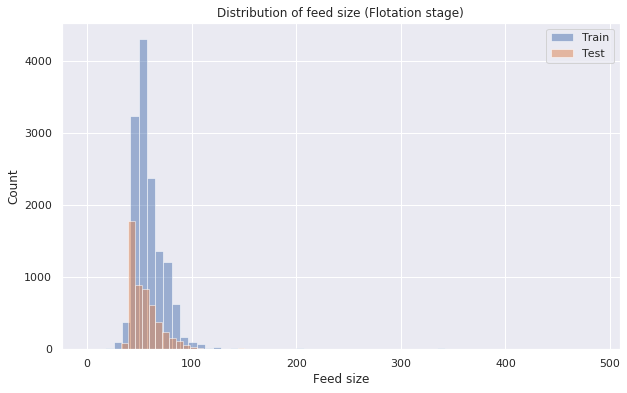

In [14]:
train['rougher.input.feed_size'].hist(bins=60, alpha=.5)
test['rougher.input.feed_size'].hist(bins=60, alpha=.5)
plt.title('Distribution of feed size (Flotation stage)')
plt.xlabel('Feed size')
plt.ylabel('Count')
plt.legend(['Train', 'Test'])

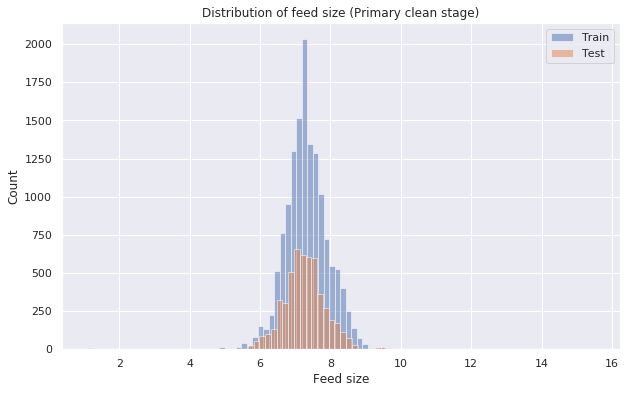

In [15]:
train['primary_cleaner.input.feed_size'].hist(bins=60, alpha=.5)
test['primary_cleaner.input.feed_size'].hist(bins=60, alpha=.5)
plt.title('Distribution of feed size (Primary clean stage)')
plt.xlabel('Feed size')
plt.ylabel('Count')
plt.legend(['Train', 'Test'])

Форма распределения для тренировочной и тестовой выборки совпадает.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Функция `total_concentration_analysis` строит график распределения суммарной концентрации на различных этапах очистки:

In [16]:
def total_concentration_analysis(data):
    raw_material_concentration = (data['rougher.input.feed_ag'] + 
                                  data['rougher.input.feed_pb'] +
                                  data['rougher.input.feed_au'] + 
                                  data['rougher.input.feed_sol']
                                 )
    rougher_output_concentration = (data['rougher.output.concentrate_ag'] + 
                                    data['rougher.output.concentrate_pb'] +
                                    data['rougher.output.concentrate_au'] + 
                                    data['rougher.output.concentrate_sol']
                                   )
    primary_output_concentration = (data['primary_cleaner.output.concentrate_ag'] +
                                    data['primary_cleaner.output.concentrate_pb'] +
                                    data['primary_cleaner.output.concentrate_sol'] +
                                    data['primary_cleaner.output.concentrate_au']
                                   )
    final_concentration = (data['final.output.concentrate_ag'] +
                           data['final.output.concentrate_pb'] +
                           data['final.output.concentrate_sol'] +
                           data['final.output.concentrate_au']
                          )
    for concentration in [raw_material_concentration,
                          rougher_output_concentration,
                          primary_output_concentration,
                          final_concentration
                         ]:
        concentration.hist(bins=60, alpha=0.5)
    plt.title('Total concentration')
    plt.xlabel('Concentration, %')
    plt.ylabel('Count')
    plt.legend(['Raw material',
                'After flotation',
                'After primary clean',
                'Final'
               ])

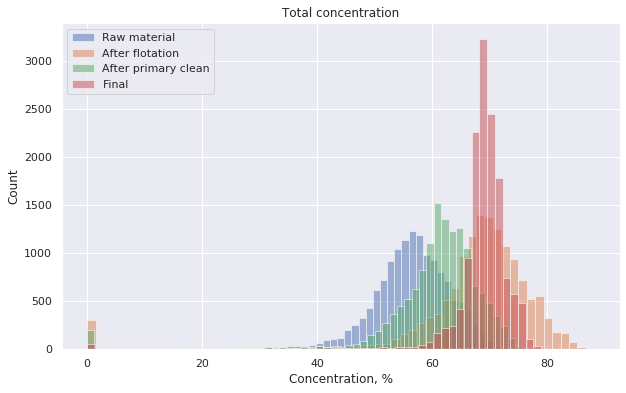

In [17]:
total_concentration_analysis(train)

Наблюдаются выбросы на нуле. Отфильтруем тренировочные данные для получение оптимальной модели:

In [18]:
cols_to_filter = ['rougher.input.feed_ag',
                  'rougher.input.feed_pb',
                  'rougher.input.feed_au',
                  'rougher.input.feed_sol',
                  'rougher.output.concentrate_ag',
                  'rougher.output.concentrate_pb',
                  'rougher.output.concentrate_au',
                  'rougher.output.concentrate_sol',
                  'primary_cleaner.output.concentrate_ag',
                  'primary_cleaner.output.concentrate_pb',
                  'primary_cleaner.output.concentrate_sol',
                  'primary_cleaner.output.concentrate_au',
                  'final.output.concentrate_ag',
                  'final.output.concentrate_pb',
                  'final.output.concentrate_sol',
                  'final.output.concentrate_au'
                 ]

Функция `valid_values`, возвращает словарь с ключами `max_av` и `min_av`, определяющими максимальные и минимальные допустимые значения (выходящие за пределы межвартильного размаха):

In [19]:
def valid_values(data, col):
    describe = data[col].describe() #Описательные статистики
    
    Q1, Q3 = describe['25%'], describe['75%'] #Первый и третий квартиль
    
    IQR = Q3 - Q1 #Межквартильный размах
    
    min_allow_value = Q1 - 1.5 * IQR
    max_allow_value = Q3 + 1.5 * IQR
    
    
    if min_allow_value < describe['min']:
        min_allow_value = describe['min'] 
    if max_allow_value > describe['max']:
        max_allow_value = describe['max']
        
    return {'max_av': max_allow_value, 'min_av': min_allow_value}

In [20]:
for col in cols_to_filter:
    print(f'Допустимые значения для столбца {col}:\n')
    print('Максимальное допустимое значения:', '{:.2f}'.format(valid_values(train, col).get('max_av')))
    print('Минимальное допустимое значения:', '{:.2f}'.format(valid_values(train, col).get('min_av')), '\n')

Допустимые значения для столбца rougher.input.feed_ag:

Максимальное допустимое значения: 14.10
Минимальное допустимое значения: 2.95 

Допустимые значения для столбца rougher.input.feed_pb:

Максимальное допустимое значения: 6.40
Минимальное допустимое значения: 0.59 

Допустимые значения для столбца rougher.input.feed_au:

Максимальное допустимое значения: 12.77
Минимальное допустимое значения: 2.89 

Допустимые значения для столбца rougher.input.feed_sol:

Максимальное допустимое значения: 47.40
Минимальное допустимое значения: 26.10 

Допустимые значения для столбца rougher.output.concentrate_ag:

Максимальное допустимое значения: 17.84
Минимальное допустимое значения: 6.08 

Допустимые значения для столбца rougher.output.concentrate_pb:

Максимальное допустимое значения: 11.23
Минимальное допустимое значения: 4.22 

Допустимые значения для столбца rougher.output.concentrate_au:

Максимальное допустимое значения: 25.83
Минимальное допустимое значения: 13.99 

Допустимые значения дл

Функция `filtered_data` возвращает отфильрованные данные:

In [21]:
def filtered_data(data, cols):
    filtered_data = data.copy(deep=True)
    for col in cols:
        filtered_data[col] = filtered_data[col][(filtered_data[col] < valid_values(data, col)['max_av']) &
                                        (filtered_data[col] > valid_values(data, col)['min_av'])]
    return filtered_data.dropna(subset=cols)

In [22]:
filtered_train = filtered_data(train, cols=cols_to_filter)

In [23]:
filtered_train.shape[0] / train.shape[0]

0.7324899286168634

Построим распределение итоговой концентрации для очищенных данных:

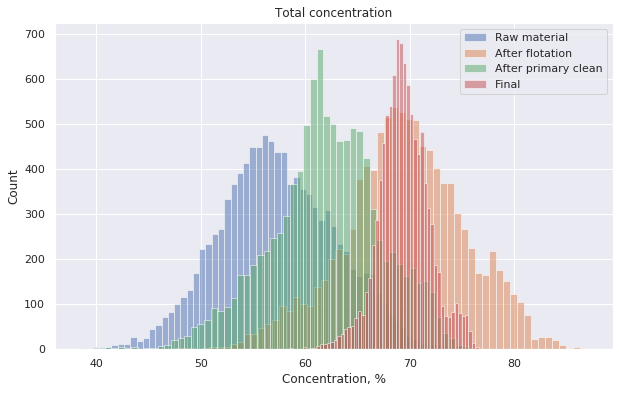

In [24]:
total_concentration_analysis(filtered_train)

### Вывод

Исследовательский анализ показал, что концентрация металлов на различных этапах очистки меняет **по разному**. Концентрация **золота** на выходе технологического процесса является **максимальной**, что и является **основной** целью очистки.

Также для получения качественной модели тренировочные данные были отфильтрованы.

## Модель

### Анализ на тренировочных данных

Введем метрику **sMAPE**, рассчитываемую по формуле:

$$ sMAPE = \frac{1}{N} \sum_{i=1}^N\frac{|y_i - \tilde{y_i}|}{0.5 \times (|y_i| + |\tilde{y_i}|)} \times 100\% $$

где:
* $y_i$ - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
* $\tilde{y_i}$ - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
* $N$ - Количество объектов в выборке.
* $\sum_{i=1}^N$ - Суммирование по всем объектам выборки (i меняется от 1 до N).

In [25]:
def sMAPE(target, predict):
    err = np.mean(abs(target - predict) / (0.5 * ((abs(target) + abs(predict))))) * 100
    return err

In [26]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

Добавим в тестовые данные столбцы с целевыми признаками:

In [34]:
test1 = test.set_index('date').copy()
full1 = full[test.columns.to_list() + ['final.output.recovery', 'rougher.output.recovery']].set_index('date').copy()

In [35]:
data_test = full1.loc[test1.index].reset_index(drop=True)

In [59]:
data_test[['final.output.recovery', 'rougher.output.recovery']]

,final.output.recovery,rougher.output.recovery
0,70.273583,89.993421
1,68.910432,88.089657
2,68.143213,88.412756
3,67.776393,87.360133
4,61.467078,83.236367
...,...,...
5285,68.919891,95.172585
5286,68.440582,94.575036
5287,67.092759,93.018138
5288,68.061186,92.599042


Данные необходимо изучать на признаках, которые есть в тестовых данных:

In [37]:
cols_rougher = test.columns.drop('date').to_list() + ['rougher.output.recovery']
cols_final = test.columns.drop('date').to_list() + ['final.output.recovery']

In [38]:
cols_rougher

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

Функция `model_analysis` возвращает значение **sMAPE** по результатам кросс-валидации:

In [39]:
def model_analysis(model_type, data, target, score, cols, depth=None, est=None):
    features_train = data[cols].drop(target, axis=1)
    target_train = data[target]
    
    if str(model_type) == 'RandomForestRegressor':
        model = model_type(random_state=RS, max_depth=depth, n_estimators=est)
    else:
        model = model_type()
    score = cross_val_score(model, features_train, target_train, cv=5, scoring=score).min()
    
    return score

Исследуем модель `Линейной регрессии` для таргета `rougher.output.recovery`:

In [40]:
model_analysis(LinearRegression, filtered_train, 'rougher.output.recovery', sMAPE_score, cols_rougher)

4.545257988987413

Исследуем модель `Случайного леса` для таргета `rougher.output.recovery`:

P.S Подбор параметров приведен ниже и закомментирован - на выполнение уходит около получаса

In [41]:
model_analysis(RandomForestRegressor,
               filtered_train,
               'rougher.output.recovery',
               sMAPE_score,
               cols_rougher,
               depth=3,
               est=100,
              )

5.48513663450617

In [42]:
#for depth in range(1, 10):
#     for est in range(10, 110, 10):
#         model = RandomForestRegressor(max_depth=depth, n_estimators=est)
#         print(f'Для depth={depth}, est={est}, score={cross_val_score(model, features_train, target_train, cv=5, scoring=sMAPE_score).min()}')

In [43]:
#params = {'max_depth': list(range(1, 9, 1)),
          #'n_estimators': list(range(10, 90, 10))
         #}
#model_grid = GridSearchCV(model, param_grid = params, scoring=sMAPE_score)
#model_grid.fit(features_train, target_train)
#print(model_grid.best_params_)
#print(model_gird.best_score_)

Исследуем модель `Линейной регрессии` для таргета `final.output.recovery`:

In [44]:
model_analysis(LinearRegression, filtered_train, 'final.output.recovery', sMAPE_score, cols_final)

8.146360792054406

Исследуем модель `Случайного леса` для таргета `final.output.recovery`:

In [45]:
model_analysis(RandomForestRegressor,
               filtered_train,
               'final.output.recovery',
               sMAPE_score,
               cols_final,
               depth=3,
               est=10,
              )

8.138860324639122

Для обоих таргетов лучшее значение метрики показывает **Линейная регрессия**.

Исходя из полученных результатов рассчитаем **итоговое sMAPE**, вычисляемое по формуле:

$$ 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final) $$

In [57]:
0.25 * 5.49 + 0.75 * 8.15

7.485000000000001

### Анализ на тестовых данных

Исследуем модель `Линейной регрессии` для таргета `rougher.output.recovery`:

In [47]:
model_analysis(LinearRegression, data_test, 'rougher.output.recovery', sMAPE_score, cols_rougher)

7.313111652968354

Исследуем модель `Линейной регрессии` для таргета `final.output.recovery`:

In [48]:
model_analysis(LinearRegression, data_test, 'final.output.recovery', sMAPE_score, cols_final)

9.235471447760922

Проверим модель `Случайного леса` на тестовых данных для тех же таргетов:

In [49]:
model_analysis(RandomForestRegressor,
               data_test,
               'rougher.output.recovery',
               sMAPE_score,
               cols_rougher,
               depth=3,
               est=100,
              )

7.475898166042459

In [50]:
model_analysis(RandomForestRegressor,
               data_test,
               'final.output.recovery',
               sMAPE_score,
               cols_final,
               depth=3,
               est=10,
              )

10.762672667011202

Исходя из полученных результатов рассчитаем **итоговое sMAPE**:

In [56]:
0.25 * 7.31 + 0.75 * 9.23

8.75

### Анализ константной модели

Анализ константной модели для `rougher.output.recovery`:

In [52]:
features_train = filtered_train[cols_rougher].drop('rougher.output.recovery', axis=1)
target_train = filtered_train['rougher.output.recovery']
features_test = data_test[cols_rougher].drop('rougher.output.recovery', axis=1)
target_test = data_test['rougher.output.recovery']

In [53]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = sMAPE(target_test, dummy_rougher_pred)
print(smape_dummy_rougher) 

8.52937025060372


Анализ константной модели для `final.output.recovery`:

In [54]:
features_train = filtered_train[cols_final].drop('final.output.recovery', axis=1)
target_train = filtered_train['final.output.recovery']
features_test = data_test[cols_final].drop('final.output.recovery', axis=1)
target_test = data_test['final.output.recovery']

In [55]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = sMAPE(target_test, dummy_rougher_pred)
print(smape_dummy_rougher) 

9.670696411591738


### Вывод

Для данной задачи были рассмотрены следующие модели:
* **LinearRegression**
* **RandomForestRegressor**

Анализ метрики **sMAPE** на тренировочных данных показал, что наиболее оптимальное значение дает модель линейной регресии - **5.49** и **8.15** для метрик `rougher.output.recovery` и `final.output.recovery` соответственно. **Итоговое sMAPE** - **7.49**.

Проверка на тестовых данных показала некоторое ухудшение метрики: **7.31** и **9.23**. **Итоговое sMAPE** - **8.75**. Тем не менее, использованная модель линейной регрессии показывает себя все также лучше случайного леса.

Анализ константной модели показал метрику **sMAPE** больше, нежели при использовании модели линейной регресии - наша модель **прошла** проверку на адекватность.

## Общий вывод

Таким образом, был проведен исследовательский анализ, а также построена модель машинного обучения для исследования следующих величин: 
* эффективность обогащения чернового концентрата (`rougher.output.recovery`);
* эффективность обогащения финального концентрата (`final.output.recovery`).

Для обоих таргетов наилучший результат показала модель **линейной регрессии**, которая позволяет получить минимальное значение исследуемых метрик **sMAPE** и **итоговое sMAPE**.